In [1]:
import pandas as pd
from pandas_datareader import data

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
goog = data.DataReader(name="GOOG", data_source="google", start="2004-01-01", end="2017-12-31")

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas_datareader/google/daily.py:40: UnstableAPIWarning: 
The Google Finance API has not been stable since late 2017. Requests seem
to fail at random. Failure is especially common when bulk downloading.

  warnings.warn(UNSTABLE_WARNING, UnstableAPIWarning)


In [3]:
goog.head()

,Open,High,Low,Close,Volume
Date,,,,,
2004-08-19,49.96,51.98,47.93,50.12,NaN
2004-08-20,50.69,54.49,50.20,54.10,NaN
2004-08-23,55.32,56.68,54.47,54.65,NaN
2004-08-24,55.56,55.74,51.73,52.38,NaN
2004-08-25,52.43,53.95,51.89,52.95,NaN


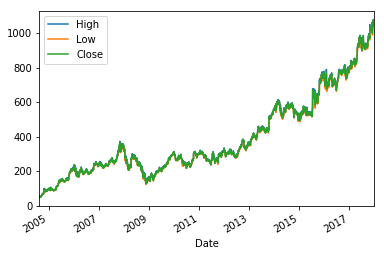

In [4]:
goog.plot(y=['High', 'Low', 'Close'])

In [5]:
# Changing the style changes for all notebook
plt.style.available

['seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-ticks',
 'fivethirtyeight',
 'seaborn-whitegrid',
 'classic',
 '_classic_test',
 'seaborn-talk',
 'seaborn-dark-palette',
 'seaborn-bright',
 'seaborn-pastel',
 'grayscale',
 'seaborn-notebook',
 'ggplot',
 'seaborn-colorblind',
 'seaborn-muted',
 'seaborn',
 'seaborn-paper',
 'bmh',
 'seaborn-white',
 'dark_background',
 'seaborn-poster',
 'seaborn-deep']

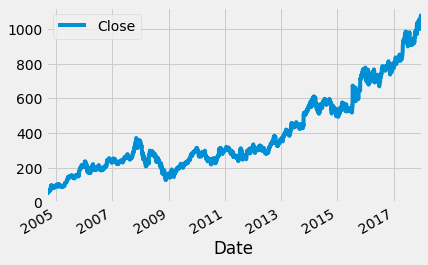

In [6]:
plt.style.use('fivethirtyeight')
goog.plot(y='Close')

In [7]:
def rank_performance(stock_price):
    if stock_price <= 200:
        return "Poor"
    elif stock_price > 200 and stock_price <= 500:
        return "Satisfactory"
    else:
        return "Stellar"

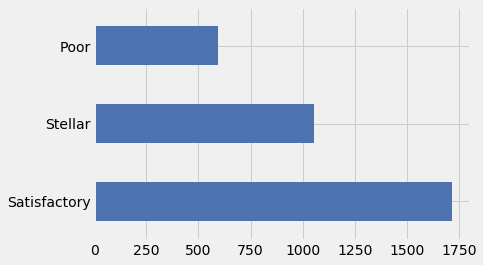

In [8]:
plt.style.use('seaborn-deep')
goog['Close'].apply(rank_performance).value_counts().plot(kind='barh')

In [9]:
apple = data.DataReader(name='AAPL', data_source='google', start='2012-01-01', end='2018-01-01')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas_datareader/google/daily.py:40: UnstableAPIWarning: 
The Google Finance API has not been stable since late 2017. Requests seem
to fail at random. Failure is especially common when bulk downloading.

  warnings.warn(UNSTABLE_WARNING, UnstableAPIWarning)


In [10]:
apple.head()

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,58.49,58.93,58.43,58.75,75564699
2012-01-04,58.57,59.24,58.47,59.06,65061108
2012-01-05,59.28,59.79,58.95,59.72,67816805
2012-01-06,59.97,60.39,59.89,60.34,79596412
2012-01-09,60.79,61.11,60.19,60.25,98505792


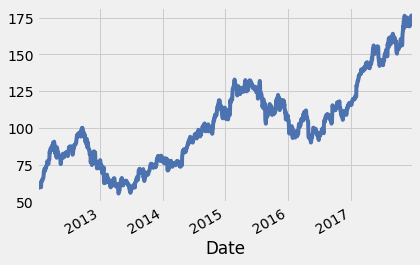

In [11]:
apple['Close'].plot()

In [12]:
apple_mean = apple['Close'].mean()
def performance(stock_price):
    if stock_price >= apple_mean:
        return "Above Average"
    else:
        return "Below Average"

In [13]:
perf_apple = apple['Close'].apply(performance)
perf_apple.head()

Date
2012-01-03    Below Average
2012-01-04    Below Average
2012-01-05    Below Average
2012-01-06    Below Average
2012-01-09    Below Average
Name: Close, dtype: object

In [14]:
perf_apple.value_counts()

Below Average    814
Above Average    695
Name: Close, dtype: int64

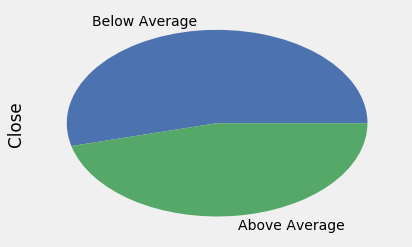

In [15]:
perf_apple.value_counts().plot(kind='pie')

In [16]:
# For histogram distributions... 
# A simple way to bin is to 
# 1. divide by bin size
# 2. round down using int
# 3. and multiply back up by bin size
bin_size =100
def custom_round(stock_price):
    return int(stock_price/100)* 100

In [17]:
custom_round(599)

500

In [18]:
# Changing the style changes for all notebook
plt.style.available

['seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-ticks',
 'fivethirtyeight',
 'seaborn-whitegrid',
 'classic',
 '_classic_test',
 'seaborn-talk',
 'seaborn-dark-palette',
 'seaborn-bright',
 'seaborn-pastel',
 'grayscale',
 'seaborn-notebook',
 'ggplot',
 'seaborn-colorblind',
 'seaborn-muted',
 'seaborn',
 'seaborn-paper',
 'bmh',
 'seaborn-white',
 'dark_background',
 'seaborn-poster',
 'seaborn-deep']

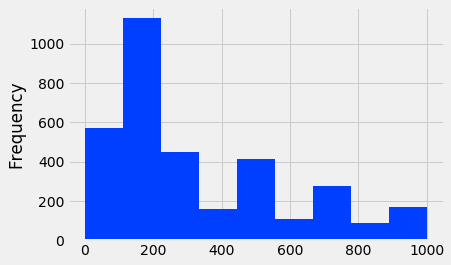

In [19]:
plt.style.use('seaborn-bright')
goog['High'].apply(custom_round).plot(kind='hist', bins=9)

In [20]:
import seaborn as sns

In [21]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


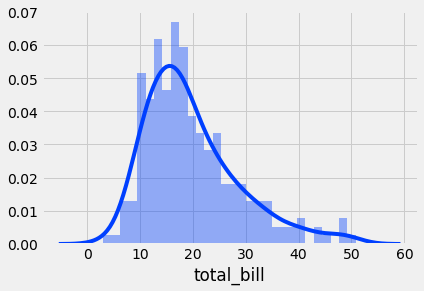

In [22]:
sns.distplot(tips['total_bill'],bins=30)

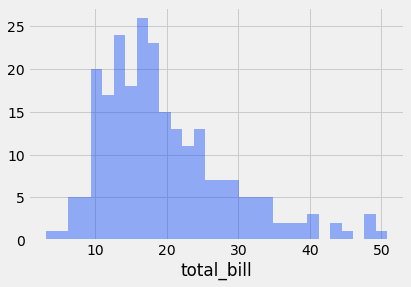

In [23]:
sns.distplot(tips['total_bill'],kde=False,bins=30)

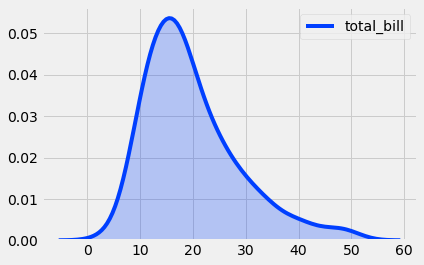

In [24]:
sns.kdeplot(tips['total_bill'], shade=True)

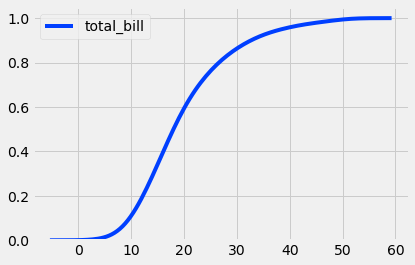

In [25]:
sns.kdeplot(tips['total_bill'], cumulative=True)

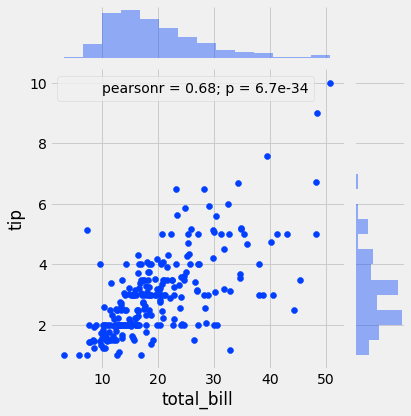

In [27]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='scatter')

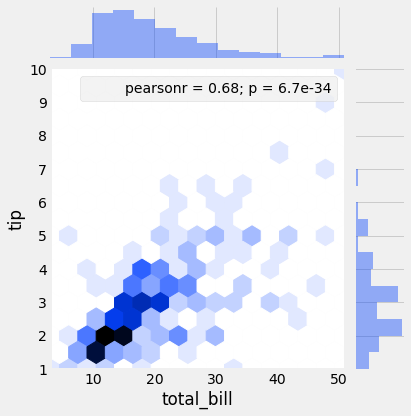

In [28]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='hex')

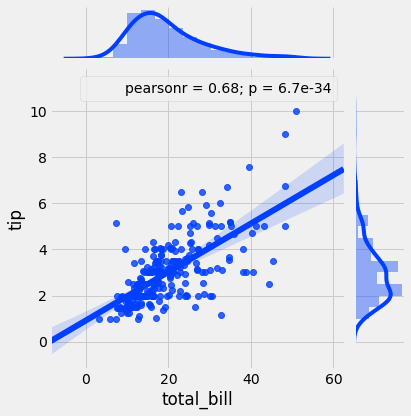

In [29]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='reg')

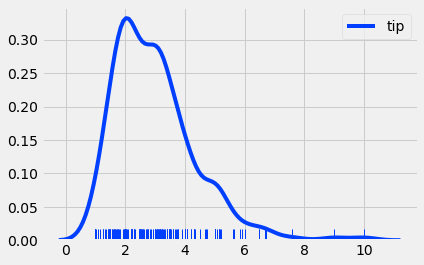

In [32]:
sns.kdeplot(tips['tip'])
sns.rugplot(tips['tip'])

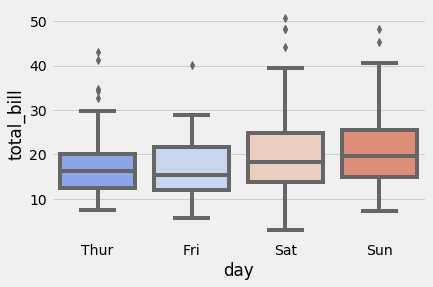

In [36]:
sns.boxplot(x="day", y="total_bill",data=tips, palette="coolwarm")

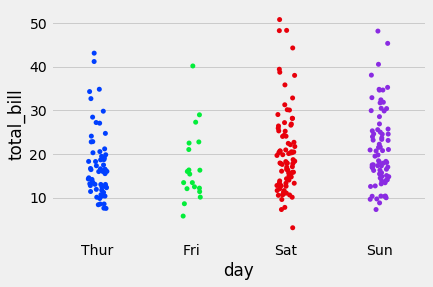

In [34]:
sns.stripplot(x="day", y="total_bill", data=tips,jitter=True)

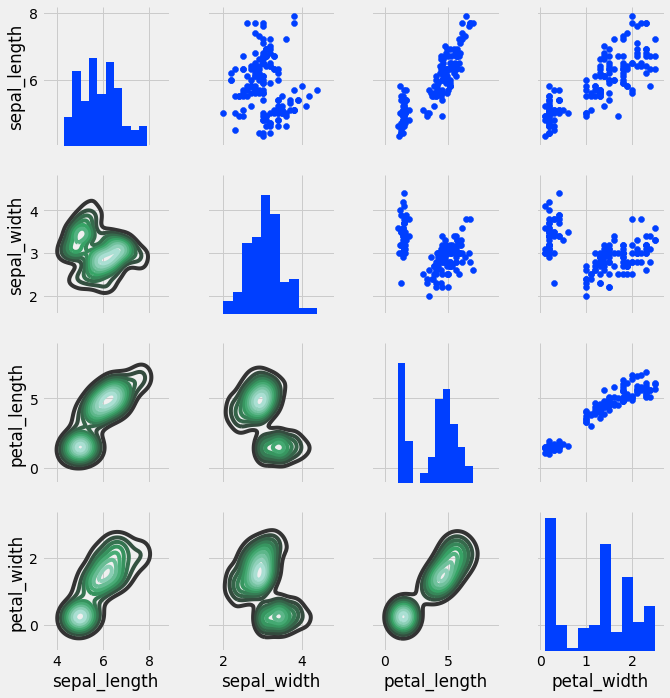

In [37]:
iris = sns.load_dataset('iris')
# Map to upper,lower, and diagonal
g = sns.PairGrid(iris)
g.map_diag(plt.hist)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)